In [15]:
# 影像資料處理 - 資料擴增
# label 處理 - 字典轉 - 與影像合併 - 資料集 -資料載入器
# 建立模型
# 訓練
# 測試
# 
import numpy as np
import torch
import imageio.v2 as imageio
import os, os.path
from torchinfo import summary
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models ##採用預先訓練好的模型架構
from torch.utils.data import ConcatDataset, Dataset, DataLoader
from torchvision.datasets import DatasetFolder
import torch.utils.data 
import pandas as pd
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
import torchvision.utils as utils

# This is for the progress bar.
# from tqdm.auto import tqdm
from tqdm.notebook import tqdm
torch.manual_seed(0)

# lr_scheduler.OneCycleLR




In [16]:
url = "https://zenodo.org/record/4002935/files/hirise-map-proj-v3.zip?download=1" ##第一個版本 用於模型訓練
url2 = "https://zenodo.org/record/4002935/files/hirise-map-proj-v3_2.zip?download=1" ##第二個版本 模型訓練第二批次


filename_v3 = url.split('/')[-1].split('?')[0]
filename_v3_2 = url2.split('/')[-1].split('?')[0]

FILE_NAME = filename_v3_2
FILE_PATH = os.path.join(os.getcwd() , "Dataset" )

# print(url.split('/')[-1].split('?')[0])
FILE_PATH

'd:\\python-learn\\Astronomy\\Dataset'

In [17]:
import os
import zipfile
import urllib.request
import sys
def _progress(block_num, block_size, total_size):
    '''回撥函式
       @block_num: 已經下載的資料塊
       @block_size: 資料塊的大小
       @total_size: 遠端檔案的大小
    '''
    sys.stdout.write('\r>> Downloading %s %.1f%%' % ("filename",
                     float(block_num * block_size) / float(total_size) * 100.0))
    sys.stdout.flush()

def fetch_title_data(url=url, path=FILE_PATH, fname=FILE_NAME):
  '''下載Web 上公開資料, 如果tgz 壓縮檔，則解壓縮'''

  tgz_path = os.path.join(os.getcwd() , FILE_NAME ) 
  urllib.request.urlretrieve(url, tgz_path, reporthook=_progress) #download file to tgz_path
  
  # 開啟 ZIP 壓縮檔
  with zipfile.ZipFile(tgz_path, 'r') as zf:
      # 列出每個檔案
      for name in tqdm(zf.namelist()):
          # 解壓縮指定檔案至 /my/folder 目錄
          zf.extract(name, path=FILE_PATH)
          
  for dirpath, dirnames, filenames in tqdm(os.walk(FILE_PATH)):
        # print(dirpath, dirnames, filenames)
    if 'map-proj-v3_2' in dirnames:
      # print(dirnames)
      # print(dirpath)
      data_dir =   os.path.join(dirpath, dirnames[0]) # data source dir
      print(data_dir)
    if "labels-map-proj_v3_2.txt" in filenames:
      # print(filenames)
      # print(dirpath)
      
      labelpath = os.path.join(dirpath, filenames[0]) #file to label 
      print(labelpath)
      break
  # labelpath =os.path.join(os.getcwd() , FILE_NAME )
  # labelpath = '/content/Dataset/labels-map-proj-v3.txt'
  # data_dir = '/content/Dataset/map-proj-v3'
  return data_dir, labelpath
  
# FILE_NAME = filename_v3_2
# # data_dir, labelpath = fetch_title_data(url2, FILE_PATH, FILE_NAME)
# FILE_NAME = filename_v3
# data_dir, labelpath = fetch_title_data(url, FILE_PATH, FILE_NAME)

# data_dir, labelpath = r"D:\python-learn\Astronomy\Dataset\hirise-map-proj-v3_2\map-proj-v3_2", r"D:\python-learn\Astronomy\Dataset\hirise-map-proj-v3_2\labels-map-proj_v3_2.txt"


In [18]:
labelpath0 = r'C:\Users\user\Desktop\NASA -computer vision\hirise-map-proj-v3\labels-map-proj-v3.txt'
data_dir0 = r'C:\Users\user\Desktop\NASA -computer vision\hirise-map-proj-v3\map-proj-v3'

# labelv3 = pd.read_csv(labelpath, delimiter=' ')
# print(labelv3.iloc[0,0])
# for i in range(len(labelv3)):
    
labelpath = r'D:\python-learn\Astronomy\Dataset\hirise-map-proj-v3_2\labels-map-proj_v3_2.txt'
data_dir = r'D:\python-learn\Astronomy\Dataset\hirise-map-proj-v3_2\map-proj-v3_2'


img_arr = imageio.imread(os.path.join(data_dir, 'ESP_011283_2265_RED-0030-r180.jpg'))
import matplotlib.pyplot as plt
# print('ESP_011283_2265_RED-0030-r180.jpg' in filenames)

print(type(img_arr), img_arr.shape)
img_arr = np.array(img_arr, dtype=np.float32)

def get_data_label(data_dir, labelpath):
        filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.jpg' ]
        # print(filenames)


        label = []
        fname = []
        # 觀察LABEL類別數量分布
        with open(labelpath, 'r' ) as f:
                map = f.readlines()
                # print((''.join(map)).splitlines())
                for i,imgXlabel in tqdm(enumerate( (''.join(map)).splitlines() )):
                        if imgXlabel.split(' ')[0] in filenames:
                                fname.append( os.path.join(data_dir, imgXlabel.split(' ')[0]) )
                                label.append( int( imgXlabel.split(' ')[1] ) )
                
        # print(fname[:5], label[:5]) 
        # np.random.shuffle(label)                    
        df = pd.DataFrame({'photo':fname, 'label':label})
        # print(df)
        return df

dfv3_2 = get_data_label(data_dir, labelpath)
dfv3 = get_data_label(data_dir0, labelpath0)
alldata = pd.concat( [dfv3, dfv3_2], axis=0)
print(alldata)
alldata.to_csv('v3&v3_2.csv', encoding='utf-8')


classes = ['other', 'crater', 'dark dune', 'slope streak', 'bright dune', 'impact ejecta', 'swiss cheese', 'spider']
print(classes)
index = list(range(len(alldata['photo'].values)))

np.random.shuffle(index) 



# count=0
# fig,ax=plt.subplots(4,2)
# fig.set_size_inches(15,15)
# for i, filename in tqdm(enumerate(index)): #依序載入每個png檔
#         if i==4:
#                 break
#         for j in range (2):        
#                 img_arr = imageio.imread(os.path.join(data_dir, filenames[count]))

#                 ax[i,j].imshow(img_arr, cmap='gray')
#                 ax[i,j].set_title("image : "+str(filenames[count]) +"\n" + "label :"+ str(classes[label[count]]) )
#                 plt.tight_layout()
#                 count+=1
                
                        



<class 'imageio.core.util.Array'> (227, 227)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

                                                   photo  label
0      C:\Users\user\Desktop\NASA -computer vision\hi...      0
1      C:\Users\user\Desktop\NASA -computer vision\hi...      0
2      C:\Users\user\Desktop\NASA -computer vision\hi...      0
3      C:\Users\user\Desktop\NASA -computer vision\hi...      0
4      C:\Users\user\Desktop\NASA -computer vision\hi...      0
...                                                  ...    ...
64942  D:\python-learn\Astronomy\Dataset\hirise-map-p...      0
64943  D:\python-learn\Astronomy\Dataset\hirise-map-p...      0
64944  D:\python-learn\Astronomy\Dataset\hirise-map-p...      0
64945  D:\python-learn\Astronomy\Dataset\hirise-map-p...      0
64946  D:\python-learn\Astronomy\Dataset\hirise-map-p...      0

[72442 rows x 2 columns]
['other', 'crater', 'dark dune', 'slope streak', 'bright dune', 'impact ejecta', 'swiss cheese', 'spider']


In [19]:
trans_flip = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.Resize( (128, 128) )
     
    ]),
    'test': transforms.Compose([
        transforms.Resize( (128, 128) ),
        
    ]),
    'name':"Horizontal Flip",
        'val_acc':0
}



trans_rotate =  {
        'train': transforms.Compose(
        [transforms.RandomRotation(180),
         transforms.Resize( (128, 128) ),
    
      
         ]),
        'test': transforms.Compose(
        [transforms.Resize( (128, 128) ),
   
         ]),
        'name':"Rotation",
        'val_acc':0
}

trans_prespective =  {
        'train': transforms.Compose(
        [transforms.RandomPerspective(),
         transforms.Resize( (128, 128) ),
       
         ]),
        'test': transforms.Compose(
        [transforms.Resize( (128, 128) ),
    
         ]),
        'name':"Prespective",
        'val_acc':0
}


trans_jitter = {
        'train': transforms.Compose(
        [transforms.ColorJitter(brightness=0.3), #saturation=0.4, contrast=0.1
         transforms.Resize( (128, 128) ),

         ]),
        'test': transforms.Compose(
        [transforms.Resize( (128, 128) ),
   
         ]),
        'name':"Jitter",
        'val_acc':0
}



trans_GaussianBlur = {
        'train': transforms.Compose(
        [transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1,2)),
         transforms.Resize( (128, 128) ),
     
         ]),
        'test': transforms.Compose(
        [transforms.Resize( (128, 128) ),
     
         ]),
        'name':"GaussianBlur",
        'val_acc':0
}

trans_CenterCrop = {
        'train': transforms.Compose(
        [transforms.Resize( (300, 300) ),
        transforms.CenterCrop((128, 128)),
       
         
         ]),
        'test': transforms.Compose(
        [transforms.Resize( (128, 128) ),
    
         ]),
        'name':"CenterCrop",
        'val_acc':0
}



transformations = [trans_flip, trans_rotate, trans_prespective, trans_jitter, trans_GaussianBlur, trans_CenterCrop]

In [20]:
def collate_fn(batch):
    batch = list(filter(lambda x: x is not None, batch))
    return torch.utils.data.dataloader.default_collate(batch) 

In [21]:
class Custom(Dataset):
    ''' Dataset for loading and preprocessing the custom  dataset '''
    def __init__(self, filepath, transformes, mode = "train"): ##img_path, labelpath,
        self.transforms = transformes
        self.mode = mode
        indexs = []
        
        df = pd.read_csv(filepath, encoding='utf-8')
        img_path = df['photo'].values
        labels = df['label'].values
        
        
        label = np.zeros((labels.shape[0], ), dtype=np.int64)
        print("photo nums :",img_path.shape[0])
        self.batches = torch.zeros(img_path.shape[0], 1, 227, 227, dtype=torch.uint8) #原本 torch.zeros
        indexs = np.arange(len(self.batches))
        np.random.shuffle(indexs)   ##產生隨機索引 讀取資料仍然是循序 但存取資料隨機
        
        
        for i, filename in tqdm(enumerate(img_path)): #依序載入每個jpg檔
            index = indexs[i]
            img_arr = imageio.imread(img_path[index] )
            
        
            img_arr = np.array(img_arr, dtype=np.float32)
            # print(img_arr.shape)
            img_arr = img_arr.reshape(1,227,227)
            img_t = torch.from_numpy(img_arr)
            
            
            
            # print(img_arr.shape, img_t.shape)
            # self.batches = torch.cat( (self.batches, img_t), 0 )#將圖片存入batch張量中

            self.batches[index] = img_t #將圖片存入batch張量中
            label[index] = labels[index] 
            # label = np.concatenate((label, np.array( [img_label[filename]]) ), axis=0)
        
        self.label_t = torch.from_numpy(label).to(torch.int64)   
        
        
        
        
        
        
        
        
        # img_label = {  }
        # indexs = []
        # self.img_path = img_path
        # self.labelpath = labelpath
        # self.transforms = transformes
        # self.mode = mode
        
        # filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.jpg' ]
        # fname = []
        
        # with open(labelpath, 'r' ) as f:
        #     map = f.readlines()
        #     for i,imgXlabel in tqdm(enumerate( (''.join(map)).splitlines())):
        #         if imgXlabel.split(' ')[0] in filenames:
        #             fname.append( imgXlabel.split(' ')[0])
        #             img_label[imgXlabel.split(' ')[0]] = int(imgXlabel.split(' ')[1])
               
        
        # indexs = np.arange(len(fname))
        # np.random.shuffle(indexs)   ##產生隨機索引 讀取資料仍然是循序 但存取資料隨機
        
        # label = np.zeros((len(fname), ), dtype=np.int64)
        # print("photo nums",len(fname))
        # self.batches = torch.zeros(len(fname), 1, 227, 227, dtype=torch.uint8) #原本 torch.zeros
        

        # for i, filename in tqdm(enumerate(fname)): #依序載入每個jpg檔
                
        #         index = indexs[i]
        #         img_arr = imageio.imread(os.path.join(data_dir, filenames[index]))
                
           
        #         img_arr = np.array(img_arr, dtype=np.float32)
        #         # print(img_arr.shape)
        #         img_arr = img_arr.reshape(1,227,227)
        #         img_t = torch.from_numpy(img_arr)
               
                
                
        #         # print(img_arr.shape, img_t.shape)
        #         # self.batches = torch.cat( (self.batches, img_t), 0 )#將圖片存入batch張量中

        #         self.batches[index] = img_t #將圖片存入batch張量中
        #         label[index] = img_label[filename] 
        #         # label = np.concatenate((label, np.array( [img_label[filename]]) ), axis=0)
        
        # self.label_t = torch.from_numpy(label).to(torch.int64) 

        
        print('label size',self.label_t.size())  
        print('batches size',self.batches.size()) #輸出batch張量的shape        
         

        self.batches = self.batches.float() #將batch張量內的像素值轉換成浮點數
        self.batches[:,0] = (self.batches[:,0] -  self.batches[:,0].mean(dim=0, keepdim=True) ) / self.batches[:,0].std(dim=0, keepdim=True)
        self.img =  self.batches 

        # ######### transform
        # temp = torch.zeros((0, 1 , 128, 128), dtype=torch.float32)
        # temp_la = torch.zeros((0,), dtype=torch.int32)
        # print('temp',temp.shape, 'temp_la',temp_la.shape) #temp torch.Size([0, 1, 227, 227]) temp_la torch.Size([0])
        # for transform in tqdm(self.transforms):
        #     self.img_t = transform['train'](self.img) #self.img[index]
            
        #     # print(self.img_t.shape) #torch.Size([1, 227, 227])
        #     temp = torch.cat((temp, self.img_t), 0)
        #     temp_la = torch.cat((temp_la, self.label_t), 0)
            
        # print('temp',temp.shape, 'temp_la',temp_la.shape) #torch.Size([1, 227, 227])   
      
        # print('Finished transfrom the  set of Mars label Dataset ({} samples found, each dim = {})'
        #       .format( len(temp), temp[:].shape))
        # self.img, self.label_t = temp, temp_la
        
        
        self.dim = self.batches.shape

        print('Finished reading the  set of Mars label Dataset ({} samples found, each dim = {})'
              .format( len(self.img), self.dim[1:]))

    def __getitem__(self, index):
        # Returns one sample at a time
         ######### transform
      
        t_num = np.random.randint(0,len(self.transforms))
        
        self.img_t = self.transforms[t_num][self.mode](self.img[index]) #self.img[index]
            
           
        # For training
        return self.img_t , self.label_t[index] 
        

    def __len__(self):
        # Returns the size of the dataset
        return len(self.img)

# print(data_dir, labelpath, transformations)
filepath = r"D:\python-learn\Astronomy\v3&v3_2.csv"
dataset = Custom(filepath, transformations)

# dataset = Custom(data_dir, labelpath, transformations)
test_loader = DataLoader(dataset, batch_size=10, shuffle=False,  num_workers = 0,  pin_memory=True, collate_fn=collate_fn)




dataiter = iter(test_loader)
data = next(dataiter)
features, labels = data
print(features.size(),labels.size())
print(features.dtype,labels.dtype)


photo nums : 72442


0it [00:00, ?it/s]

label size torch.Size([72442])
batches size torch.Size([72442, 1, 227, 227])
Finished reading the  set of Mars label Dataset (72442 samples found, each dim = torch.Size([1, 227, 227]))
torch.Size([10, 1, 128, 128]) torch.Size([10])
torch.float32 torch.int64


In [22]:
# show plot function
# show plot function
def imshow(img):
    img = img /2 +0.5 #縮小圖片非正規化
    # img = img.type(torch.uint8)
    npimg = img.numpy()
    
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

def plot_learning_curve(loss_record, title=''):
    ''' Plot learning curve of your DNN (train & dev loss) '''
    import math
    total_steps = len(loss_record['train'])
    total_steps_d = len(loss_record['dev'])
    x_1 = range(total_steps)
    x_2 = x_1[::math.floor(len(loss_record['train']) / len(loss_record['dev']))]   ## 間隔 ? 的所有元素 len(loss_record['train']) // len(loss_record['dev'])
    
    # x_2 = range(total_steps_d)
    
    plt.figure(figsize=(6, 4))
    # plt.plot(x_2, loss_record['dev'], c='tab:cyan', label='dev')
    plt.plot(x_1, loss_record['train'], c='tab:red', label='train')
    plt.plot(x_2, loss_record['dev'], c='tab:cyan', label='dev')
    plt.ylim(0.0, 5.)
    plt.xlabel('Training steps')
    plt.ylabel('Cross Entropy')
    plt.title('Learning curve of {}'.format(title))
    plt.legend()
    plt.show()


def save_loss_record(loss_record, title='Mars_classfier_', fpath=r'D:\python-learn\Astronomy\data'):
    
    total_steps = len(loss_record['train'])
    # x_1 = range(total_steps)
    # x_2 = x_1[::len(loss_record['train']) // len(loss_record['dev'])]   ## 間隔 ? 的所有元素
    with open( (title +'loss.csv' ), 'w') as f:  
        f.write("i,trainloss\n")
        for i,t  in enumerate(loss_record['train']): 
            f.write(f"{i},{str(t)}\n")
        f.write("0,0\n")
        for i,d  in enumerate(loss_record['dev']): 
            f.write(f"{i},{str(d)}\n")   
        

def plot_pred(data_loader, model, device, lim=9., preds=None, targets=None):
    ''' Plot prediction of your DNN ,return X_test, y_t, y_p'''
    img_test = np.zeros((0, 1, 128, 128))
    if preds is None or targets is None:
        model.eval()                        #?
        preds, targets = [], []
        for x, y in tqdm(data_loader):
            img_test = np.vstack( (img_test, x))
            x, y = x.to(device), y.to(device)
            
            with torch.no_grad():
                pred = model(x)
                preds.append(pred.detach().cpu()) ##ValueError: only one element tensors can be converted to Python scalars
                targets.append(y.detach().cpu())
        # print(type(preds))
        
        # preds = np.array(preds, dtype=np.float32)
        # print(preds.shape)
        # preds_t = torch.from_numpy(preds)
        # print(preds_t.shape)
        
        # _, max = torch.max(preds_t, dim=1).numpy()
        preds = torch.cat(preds, dim=0)             # torch.cat() 是相當高效的，也確實能完成如同 List 中的 append() dim0 維度拼接
        _, max = torch.max(preds, dim=1)
        
        # print(len(max))
        print(max.numpy().shape)
        
        targets = torch.cat(targets, dim=0).numpy()         #?
        print(targets.shape)

    plt.figure(figsize=(5, 5))
    plt.scatter(targets, max.numpy(), c='r', alpha=0.5)
    plt.plot([-0.2, lim], [-0.2, lim], c='cyan')
    plt.xlim(-0.2, lim)
    plt.ylim(-0.2, lim)
    plt.xlabel('ground truth value')
    plt.ylabel('predicted value')
    plt.title('Ground Truth v.s. Prediction')
    plt.show()
    return img_test, targets, max.numpy()  ## 最好畫出那些預測錯誤0214~~~

In [23]:
### #Random split


train_set, valid_set, test_set = torch.utils.data.random_split(dataset, [0.6, 0.3, 0.1])
print('train_set',len(train_set))
print('valid_set',len(valid_set))
print('test_set',len(test_set))


train_set 43466
valid_set 21732
test_set 7244


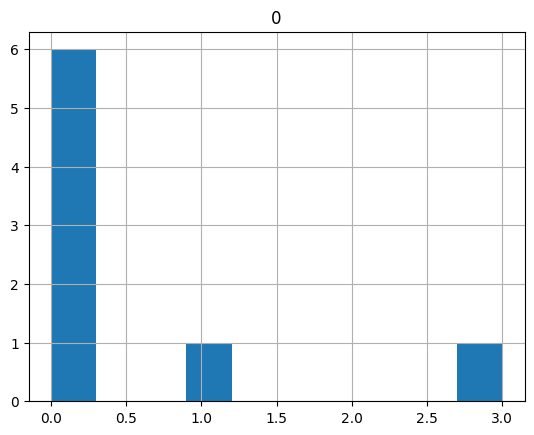

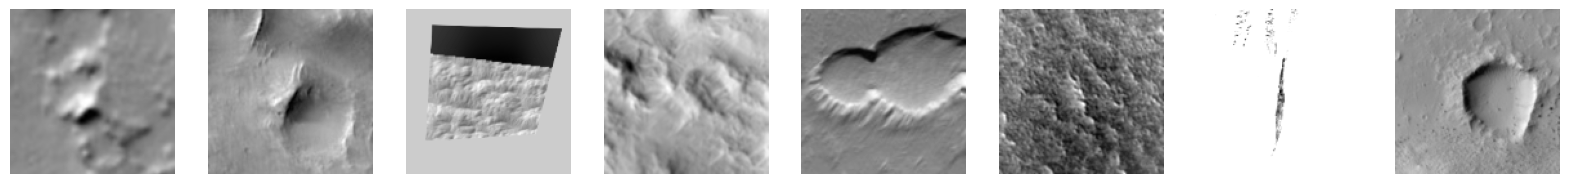

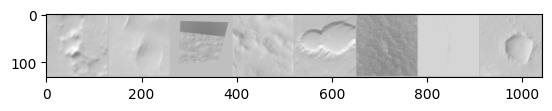

In [24]:
dataloaders = torch.utils.data.DataLoader(train_set,
                                                        batch_size=8, 
                                                        shuffle=True, num_workers = 0,  pin_memory=True, collate_fn=collate_fn)
                     
    

# Get a batch of training data
img, classes = next(iter(dataloaders))

# print(inputs.dtype, classes.dtype)
# print(len(inputs))
label_hist = pd.DataFrame(data= classes.numpy()).hist()
plt.show()

to_pil = transforms.ToPILImage()    #轉換成PIL image
fig=plt.figure(figsize=(20,20))


# 灰階影像呈現
# Make a grid from batch
for ii in range(len(img)):
        image = img[ii].numpy()
        sub = fig.add_subplot(1, len(img), ii+1)
        # print('shape',image.shape)
        image = image.transpose(1, 2, 0)
        plt.axis('off')
        plt.imshow(image, cmap=plt.get_cmap('gray'))
        
plt.show()        
# img = torch.unsqueeze(img, 1)
# print(img.shape)
out = utils.make_grid(img)
imshow(utils.make_grid(out,normalize=True))
plt.show()
# dataseteslist = {
#         'train':[], 
#         'valid':[], 
#         'test':[]  
# }

# for transformation in tqdm(transformations):
#         # print(transformation)
#         # alldataset = DatasetFolder(data_dir, loader=img_open, extensions="jpg", transform=train_tfm ) #一個class對應一個資料夾        
#         dataseteslist['train'].append(train_set)
#         dataseteslist['valid'].append(valid_set)
#         dataseteslist['test'].append(test_set)
#         datasetes = {
#         'train':train_set, 
#         'valid':valid_set, 
#         'test':test_set  
#         }
        
      
        
#         dataloaders = {x: torch.utils.data.DataLoader(datasetes[x],
#                                                         batch_size=8, 
#                                                         shuffle=True, num_workers = 0,  pin_memory=True, collate_fn=collate_fn)
#                         for x in ['train', 'valid','test' ]}
#         dataset_sizes = {x: len(datasetes[x]) for x in ['train', 'valid', 'test']}

#         # Get a batch of training data
#         img, classes = next(iter(dataloaders['train']))
        
#         # print(inputs.dtype, classes.dtype)
#         # print(len(inputs))
#         label_hist = pd.DataFrame(data= classes.numpy()).hist()
#         plt.show()
        
#         to_pil = transforms.ToPILImage()    #轉換成PIL image
#         fig=plt.figure(figsize=(20,20))
 
 
#         # 灰階影像呈現
#         # Make a grid from batch
#         for ii in range(len(img)):
#                 image = img[ii].numpy()
#                 sub = fig.add_subplot(1, len(img), ii+1)
#                 # print('shape',image.shape)
#                 image = image.transpose(1, 2, 0)
#                 plt.axis('off')
#                 plt.imshow(image, cmap=plt.get_cmap('gray'))
#         # img = torch.unsqueeze(img, 1)
#         # print(img.shape)
#         out = utils.make_grid(img)
#         imshow(utils.make_grid(out,normalize=True))
        



In [25]:
# print(len(dataseteslist['train']))

# train_concat_dataset = ConcatDataset(dataseteslist['train']) # 
# valid_concat_dataset = ConcatDataset(dataseteslist['valid']) # 
# test_concat_dataset = ConcatDataset(dataseteslist['test']) #
''' 'train':train_concat_dataset, 
        'valid':valid_concat_dataset, 
        'test':test_concat_dataset  '''

datasetes = {
        'train':train_set, 
        'valid':valid_set, 
        'test':test_set  
        }

print(len(datasetes['train'])) ##3080
print(len(datasetes['valid'])) ##660
print(len(datasetes['test'])) ##47


batch_size = 64 ######

dataloaders = {x: torch.utils.data.DataLoader(datasetes[x],
                                                        batch_size=batch_size, shuffle=True, num_workers = 0,  pin_memory=True, collate_fn=collate_fn)
                        for x in ['train', 'valid']} 
train_loader = dataloaders['train']

valid_loader = dataloaders['valid']

test_loader = torch.utils.data.DataLoader(datasetes['test'],
                                                        batch_size=batch_size, shuffle=False, num_workers = 0,  pin_memory=True, collate_fn=collate_fn)
                       


dataiter = iter(train_loader)
data = next(dataiter)
features, labels = data
print(features.size(),labels.size())
print(features.dtype,labels.dtype)
print(len(train_loader))  # 批次的 步數
print(len(valid_loader))


43466
21732
7244
torch.Size([64, 1, 128, 128]) torch.Size([64])
torch.float32 torch.int64
680
340


In [26]:
class ResBlock(nn.Module):
    "resblock mean=0, std=0.5"
    def __init__(self, n_chans) -> None:
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3, padding=1, bias=False)
        self.batch_norm= nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal(self.conv.weight, nonlinearity='relu')
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)
    
    def forward(self, x ):
        out = self.conv(x)
        out = self.batch_norm(out)
        # out = torch.relu(out)
        out = torch.relu(out)  #########################<<---
        
        return out + x
    
    
class Classifier(nn.Module):
    "客製化模型，實作運用殘差塊提升深度"
    def __init__(self, n_chans = 32, n_blocks=5):
        super(Classifier, self).__init__()
        self.n_chans = n_chans
       
        # The arguments for commonly used modules:
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # torch.nn.MaxPool2d(kernel_size, stride, padding)

        # input image size: [1, 128, 128]
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(1, n_chans, 3, 1, 1), ## (shape - kernelsize + 2 * padding)/stride + 1 = 下一張尺寸
            # (128 - 3 + 2 * 1 )/1 + 1  = 128
            # [64, 128, 128]
            nn.BatchNorm2d(n_chans),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0), # 縮小 寬 高2倍 ,往外延伸的 寬 高

            nn.Conv2d(n_chans, n_chans*2, 3, 1, 1),########
            nn.BatchNorm2d(n_chans*2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),#############

            nn.Conv2d(n_chans*2, n_chans*2, 3, 1, 1),
            nn.BatchNorm2d(n_chans*2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(n_chans*2, n_chans*4, 3, 1, 1),
            nn.BatchNorm2d(n_chans*4),
            nn.ReLU(),
            # nn.Dropout2d(), ###
            nn.MaxPool2d(4, 4, 0)
        )
        
         
        self.resblocks = nn.Sequential(
           
           *(n_blocks * [ResBlock(n_chans=n_chans*4)] )
        )
        
        
        self.fc_layers = nn.Sequential(
            nn.Linear(n_chans*4 * 4 * 4, 1000), #1000
            nn.BatchNorm1d(1000),
            nn.ReLU(),
            
            nn.Linear(1000, 512),
            nn.ReLU(),
            
            nn.Linear(512, 8)
        )

    def forward(self, x):
        # input (x): [batch_size, 1, 128, 128]
        # output: [batch_size, 8]

        # Extract features by convolutional layers.
        x = self.cnn_layers(x)

        # resblocks
        x = self.resblocks(x)
        # The extracted feature map must be flatten before going to fully-connected layers.
        x = x.flatten(1)

        # The features are transformed by fully-connected layers to obtain the final logits.
        x = self.fc_layers(x)
        return x

In [27]:
def dev(dv_set, model, device):
    model.eval()                                # set model to evalutation mode
    total_loss = 0
    total_acc = []
    for x, y in tqdm(dv_set):                         # iterate through the dataloader
        x, y = x.to(device), y.to(device)       # move data to device (cpu/cuda)
        with torch.no_grad():                   # disable gradient calculation
            pred = model(x)                     # forward pass (compute output)
            loss_test = criterion(pred, y)  # compute loss
        total_loss += loss_test.detach().cpu().item()   # accumulate loss
         # Compute the accuracy for current batch.
        acc = (pred.argmax(dim=-1) == y.to(device)).float().mean()
        total_acc.append(acc)
    total_loss = total_loss / len(dv_set.dataset)              # compute averaged loss
    total_acc = sum(total_acc) / len(total_acc)
    del pred, loss_test, acc  ####測試 速度!
    return total_loss, total_acc

In [28]:
## 建立模型前的參數與變數 & 建立模型

# "cuda" only when GPUs are available.
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize a model, and put it on the device specified.
# model = models.resnet18(pretrained=False)

model = Classifier(n_chans=32, n_blocks=3).to(device) #0117 收斂太慢的原因是你的loss.item() 耗掉大量計算儲存資源
# model = model.to(device)

# 儲存地址
save_path = r'D:\python-learn\Astronomy\model_mars_geo_classifier.pth'
# save_path = r'D:\python-learn\AI_Pytorch\ML2022\models\model_resnet18.pth' ### 字典檔
# save_path = r'D:\python-learn\AI_Pytorch\ML2022\models\model_custom.pth'    ##Saving model (epoch =   15, loss = 1.4089, acc = 0.5256)
# save_path = '/content/drive/model.pth'

# model = torch.load(save_path)



# print(model.fc) #18-Linear(in_features=512, out_features=1000, bias=True)
# num_ftrs = model.fc.in_features     #模型的FC  最後一層input數量
# Wire the neurons together to create the neural network

# model.fc = nn.Sequential(nn.Linear(2048, 11)
#                          #   nn.BatchNorm1d(100),
#                          #    nn.ReLU(),
#                          #    nn.Dropout(0.5),
                                                       
#                          #    nn.Linear(100, 11)
                           
#                             # nn.LogSoftmax(dim=1)
# )


# model = models.resnet18(pretrained=True)
# num_ftrs = model.fc.in_features     #模型的FC  最後一層input數量
# # Here the size of each output sample is set to 2.
# # Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
# model.fc = nn.Linear(num_ftrs, 11)   #更改最後一層輸出(根據種類數量)


# Build all the neurons
for name, param in model.named_parameters():
  if 'fc' in name:
    print(name)
    param.requires_grad = True # 只訓練fc 層
  else:
    print("鎖住層數",name)
    param.requires_grad = True # conv 鎖住   

P = [ param.numel() for param in model.parameters()]
print(f"模型容量:  {sum(P)}\n各參數量: {P}")
     
# for param in model.parameters():
#      param.requires_grad = True


# model = model.to(device)
# model.device = device

# 載入訓練好的權重
state = torch.load(save_path,  map_location='cpu') #
# # print(type(state))
# # ## print(state.keys())
# # #TypeError: Expected state_dict to be dict-like, got <class 'torchvision.models.resnet.ResNet'>.
model.load_state_dict(state) #
# model = torch.load(save_path)



# loss and optimizer
# criterion = nn.NLLLoss()

# For the classification task, we use cross-entropy as the measurement of performance.
criterion = nn.CrossEntropyLoss()

# Initialize optimizer, you may fine-tune some hyperparameters such as learning rate on your own.
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-3) #, weight_decay 加入懲罰項讓loss平順化=1e-3 0.0003
# step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)    #step_size=10, gamma=0.5
# https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ReduceLROnPlateau.html#torch.optim.lr_scheduler.ReduceLROnPlateau
preformance_lr_schtduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, 
                                                                      threshold=0.0001, threshold_mode='rel', cooldown=0, 
                                                                      min_lr=0, eps=1e-08, verbose=True)

# OneCycleLR = lr_scheduler.OneCycleLR(optimizer, max_lr=1e-3, epochs=100, steps_per_epoch=900)



# The number of training epochs.
n_epochs = 1000



# set min loss


min_loss = 0.0060
valid_acc = 0
valid_loss = 0
loss_record = {'train': [], 'dev': []}      # for recording training loss
'''
02-07-[ Train | 012/200 ] loss = 0.58284, acc = 0.84865
2249/2249 [01:03<00:00, 34.96it/s]
Saving model (epoch =   12, loss = 0.5946, acc = 0.8408)
[ Valid | 012/200 ] loss = 0.59458, acc = 0.84080'''


'''
2-12 lr=0.003, weight_decay=1e-2)
[ Train | 020/200 ] loss = 0.32719, acc = 0.90635
100%
2249/2249 [00:58<00:00, 39.48it/s]
Saving model (epoch =   20, loss = 0.4479, acc = 0.8754)
[ Valid | 020/200 ] loss = 0.44788, acc = 0.87536'''


'''02-13
lr=0.003, weight_decay=1e-1)
step_size=5, gamma=0.5) 
[ Train | 024/200 ] loss = 0.65922, acc = 0.83697
100%
Saving model (epoch =   24, loss = 0.6969, acc = 0.8277)
[ Valid | 024/200 ] loss = 0.69689, acc = 0.82768


-----------------
lr=0.002, weight_decay=1e-2) #, weight_decay 加入懲罰項讓loss平順化=1e-3 0.0003
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) 
[ Train | 018/200 ] loss = 0.35889, acc = 0.89479
100%
2249/2249 [00:57<00:00, 42.40it/s]
Saving model (epoch =   18, loss = 0.4455, acc = 0.8747)
[ Valid | 018/200 ] loss = 0.44546, acc = 0.87474


-----------------------
02-15-lr=0.0005, weight_decay=1e-3)-step_size=5, gamma=0.5)  
[ Train | 043/200 ] loss = 0.32497, acc = 0.90151
100%
36/36 [00:05<00:00, 6.20it/s]
Saving model (epoch =   43, loss = 0.0065, acc = 0.8733)
[ Valid | 043/200 ] loss = 0.00648, acc = 0.87326


02-15
 lr=0.0005, weight_decay=1e-3)
 step_size=5, gamma=0.5)
[ Train | 031/200 ] loss = 0.32360, acc = 0.90028
  0%|          | 0/36 [00:00<?, ?it/s]Saving model (epoch =   31, loss = 0.0061, acc = 0.8832)
[ Valid | 031/200 ] loss = 0.00607, acc = 0.88325


0225
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-3) 
preformance_lr_schtduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, 
                                                                      threshold=0.0001, threshold_mode='rel', cooldown=0, 
                                                                      min_lr=0, eps=1e-08, verbose=True)
[ Train | 179/1000 ] loss = 0.25452, acc = 0.92058
1.9073486328125e-08
Saving model (epoch =  179, loss = 0.0040, acc = 0.9203)
[ Valid | 179/1000 ] loss = 0.00402, acc = 0.92029
'''




# 控制幾個 EPOCH 停止訓練
early_stop_cnt = 0

# 模型結構摘要
print( summary(model, input_size=(batch_size, 1, 128, 128) ) )

''''
我把好的classifier 換來就可以了....
所以我有動到模型結構 
RuntimeError: Failed to run torchinfo. See above stack traces for more details. 
Executed layers up to: [Sequential: 1, Conv2d: 2, BatchNorm2d: 2, ReLU: 2, MaxPool2d: 2, Conv2d: 2, BatchNorm2d: 2, ReLU: 2, MaxPool2d: 2, Conv2d: 2, BatchNorm2d: 2, ReLU: 2, Dropout2d: 2, MaxPool2d: 2, Linear: 2]'''

C:\Users\user\AppData\Local\Temp\ipykernel_33976\2513823970.py:7: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  torch.nn.init.kaiming_normal(self.conv.weight, nonlinearity='relu')


鎖住層數 cnn_layers.0.weight
鎖住層數 cnn_layers.0.bias
鎖住層數 cnn_layers.1.weight
鎖住層數 cnn_layers.1.bias
鎖住層數 cnn_layers.4.weight
鎖住層數 cnn_layers.4.bias
鎖住層數 cnn_layers.5.weight
鎖住層數 cnn_layers.5.bias
鎖住層數 cnn_layers.8.weight
鎖住層數 cnn_layers.8.bias
鎖住層數 cnn_layers.9.weight
鎖住層數 cnn_layers.9.bias
鎖住層數 cnn_layers.12.weight
鎖住層數 cnn_layers.12.bias
鎖住層數 cnn_layers.13.weight
鎖住層數 cnn_layers.13.bias
鎖住層數 resblocks.0.conv.weight
鎖住層數 resblocks.0.batch_norm.weight
鎖住層數 resblocks.0.batch_norm.bias
fc_layers.0.weight
fc_layers.0.bias
fc_layers.1.weight
fc_layers.1.bias
fc_layers.3.weight
fc_layers.3.bias
fc_layers.5.weight
fc_layers.5.bias
模型容量:  2845504
各參數量: [288, 32, 32, 32, 18432, 64, 64, 64, 36864, 64, 64, 64, 73728, 128, 128, 128, 147456, 128, 128, 2048000, 1000, 1000, 1000, 512000, 512, 4096, 8]
Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [64, 8]                   --
├─Sequential: 1-1                        [64, 128, 4, 4]    

"'\n我把好的classifier 換來就可以了....\n所以我有動到模型結構 \nRuntimeError: Failed to run torchinfo. See above stack traces for more details. \nExecuted layers up to: [Sequential: 1, Conv2d: 2, BatchNorm2d: 2, ReLU: 2, MaxPool2d: 2, Conv2d: 2, BatchNorm2d: 2, ReLU: 2, MaxPool2d: 2, Conv2d: 2, BatchNorm2d: 2, ReLU: 2, Dropout2d: 2, MaxPool2d: 2, Linear: 2]"

In [29]:


for epoch in tqdm(range(n_epochs)):
    
    # ---------- Training ----------
    # Make sure the model is in train mode before training.
    model.train()

    # These are used to record information in training.
    train_loss = []
    train_accs = []

    # Iterate the training set by batches.
    for batch in tqdm(train_loader):

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        # print(imgs.shape, labels.shape)
        # Forward the data. (Make sure data and model are on the same device.)
        logits = model(imgs.to(device))

        # Calculate the cross-entropy loss.
        # We don't need to apply softmax before computing cross-entropy as it is done automatically.
        loss = criterion(logits, labels.to(device))

        # Gradients stored in the parameters in the previous step should be cleared out first.
        optimizer.zero_grad()

        # Compute the gradients for parameters.
        loss.backward()
        # print("loss type", type(loss))

        # Clip修剪 the gradient norms for stable training.
        grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=10)

        # Update the parameters with computed gradients.
        optimizer.step()

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels.to(device)).float().mean()
        # print("acc type", type(acc))
        # Record the loss and accuracy.
        loss_record['train'].append(loss.detach().cpu().item()) # 當設定 detach() 後，即停止追蹤該 Tensor 的梯度計算，其梯度值為 None。
        train_loss.append(loss.detach().cpu().item())
        # train_loss.append(loss.item()) #####這樣會運算得很慢很慢很慢!!!!因為梯度仍然追蹤也沒複製到CPU用CUDA處理會耗掉很多資源
        
        train_accs.append(acc.detach().cpu().item())
        # OneCycleLR.step()

    
    # 跑完一次訓練做學習率更新
    # step_lr_scheduler.step()
    
    # The average loss and accuracy of the training set is the average of the recorded values.
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)

    # Print the information.
    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] loss = {train_loss:.5f}, acc = {train_acc:.5f}")

    # ---------- Validation ----------
    # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
    model.eval()

  
    valid_loss, valid_accs =  dev(valid_loader, model, device)
    preformance_lr_schtduler.step(metrics=valid_loss)  #依據驗證 loss 如果驗證沒降低 則耐心超出後下降
    print(preformance_lr_schtduler.optimizer.param_groups[0]['lr'])  ##顯示lr
    # print(step_lr_scheduler.optimizer.param_groups[0]['lr'])  ##顯示lr
    
    # print(OneCycleLR.optimizer.param_groups[0]['lr'])  ##顯示lr
    
    if valid_loss < min_loss :
  
        # Save model if your model improved
        min_loss = valid_loss
        print('Saving model (epoch = {:4d}, loss = {:.4f}, acc = {:.4f})'
            .format(epoch + 1, min_loss, valid_accs))
        torch.save(model.state_dict(), save_path)  # Save model 的參數 為字典檔 to specified path
        # torch.save(model, save_path) #這個整個MODEL 儲存
        early_stop_cnt = 0
    else:
        early_stop_cnt += 1
        
    loss_record['dev'].append(valid_loss)
    # save_loss_record(loss_record)               ##儲存loss好視覺化與驗證
    if early_stop_cnt > 50:
            # Stop training if your model stops improving for "config['early_stop']" epochs.
            break

    # Print the information.
    print(f"[ Valid | {epoch + 1:03d}/{n_epochs:03d} ] loss = {valid_loss:.5f}, acc = {valid_accs:.5f}")

# torch.cuda.empty_cache()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 001/1000 ] loss = 0.62505, acc = 0.83247


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 001/1000 ] loss = 0.00901, acc = 0.84800


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 002/1000 ] loss = 0.54804, acc = 0.84652


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 002/1000 ] loss = 0.00840, acc = 0.85324


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 003/1000 ] loss = 0.51879, acc = 0.85179


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 003/1000 ] loss = 0.00788, acc = 0.85366


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 004/1000 ] loss = 0.49829, acc = 0.85573


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 004/1000 ] loss = 0.00886, acc = 0.84564


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 005/1000 ] loss = 0.47900, acc = 0.86187


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 005/1000 ] loss = 0.00772, acc = 0.86349


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 006/1000 ] loss = 0.46990, acc = 0.86362


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 006/1000 ] loss = 0.00783, acc = 0.86626


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 007/1000 ] loss = 0.45949, acc = 0.86743


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 007/1000 ] loss = 0.00726, acc = 0.86837


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 008/1000 ] loss = 0.45296, acc = 0.86888


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 008/1000 ] loss = 0.00721, acc = 0.87054


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 009/1000 ] loss = 0.44410, acc = 0.87140


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 009/1000 ] loss = 0.00731, acc = 0.86404


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 010/1000 ] loss = 0.43495, acc = 0.87330


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 010/1000 ] loss = 0.00726, acc = 0.87055


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 011/1000 ] loss = 0.43447, acc = 0.87334


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 011/1000 ] loss = 0.00683, acc = 0.87702


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 012/1000 ] loss = 0.42718, acc = 0.87538


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 012/1000 ] loss = 0.00727, acc = 0.87292


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 013/1000 ] loss = 0.42974, acc = 0.87513


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 013/1000 ] loss = 0.00670, acc = 0.87458


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 014/1000 ] loss = 0.42535, acc = 0.87658


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 014/1000 ] loss = 0.00684, acc = 0.86684


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 015/1000 ] loss = 0.42094, acc = 0.87690


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 015/1000 ] loss = 0.00700, acc = 0.87113


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 016/1000 ] loss = 0.42167, acc = 0.87813


  0%|          | 0/340 [00:00<?, ?it/s]

0.005
[ Valid | 016/1000 ] loss = 0.00959, acc = 0.82366


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 017/1000 ] loss = 0.41823, acc = 0.87767


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00017: reducing learning rate of group 0 to 2.5000e-03.
0.0025
[ Valid | 017/1000 ] loss = 0.00708, acc = 0.85800


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 018/1000 ] loss = 0.38466, acc = 0.88789


  0%|          | 0/340 [00:00<?, ?it/s]

0.0025
Saving model (epoch =   18, loss = 0.0059, acc = 0.8894)
[ Valid | 018/1000 ] loss = 0.00592, acc = 0.88935


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 019/1000 ] loss = 0.37986, acc = 0.88711


  0%|          | 0/340 [00:00<?, ?it/s]

0.0025
[ Valid | 019/1000 ] loss = 0.00606, acc = 0.88810


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 020/1000 ] loss = 0.37201, acc = 0.88844


  0%|          | 0/340 [00:00<?, ?it/s]

0.0025
[ Valid | 020/1000 ] loss = 0.00595, acc = 0.89163


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 021/1000 ] loss = 0.37337, acc = 0.88949


  0%|          | 0/340 [00:00<?, ?it/s]

0.0025
Saving model (epoch =   21, loss = 0.0058, acc = 0.8939)
[ Valid | 021/1000 ] loss = 0.00581, acc = 0.89393


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 022/1000 ] loss = 0.37531, acc = 0.89002


  0%|          | 0/340 [00:00<?, ?it/s]

0.0025
Saving model (epoch =   22, loss = 0.0058, acc = 0.8903)
[ Valid | 022/1000 ] loss = 0.00581, acc = 0.89031


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 023/1000 ] loss = 0.37245, acc = 0.88954


  0%|          | 0/340 [00:00<?, ?it/s]

0.0025
[ Valid | 023/1000 ] loss = 0.01408, acc = 0.70966


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 024/1000 ] loss = 0.36720, acc = 0.89076


  0%|          | 0/340 [00:00<?, ?it/s]

0.0025
Saving model (epoch =   24, loss = 0.0056, acc = 0.8961)
[ Valid | 024/1000 ] loss = 0.00558, acc = 0.89610


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 025/1000 ] loss = 0.36810, acc = 0.89158


  0%|          | 0/340 [00:00<?, ?it/s]

0.0025
[ Valid | 025/1000 ] loss = 0.00578, acc = 0.89149


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 026/1000 ] loss = 0.36886, acc = 0.89140


  0%|          | 0/340 [00:00<?, ?it/s]

0.0025
[ Valid | 026/1000 ] loss = 0.00568, acc = 0.89331


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 027/1000 ] loss = 0.36894, acc = 0.89024


  0%|          | 0/340 [00:00<?, ?it/s]

0.0025
[ Valid | 027/1000 ] loss = 0.00617, acc = 0.88315


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 028/1000 ] loss = 0.36492, acc = 0.89110


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00028: reducing learning rate of group 0 to 1.2500e-03.
0.00125
[ Valid | 028/1000 ] loss = 0.00600, acc = 0.88788


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 029/1000 ] loss = 0.34100, acc = 0.89907


  0%|          | 0/340 [00:00<?, ?it/s]

0.00125
Saving model (epoch =   29, loss = 0.0051, acc = 0.9048)
[ Valid | 029/1000 ] loss = 0.00509, acc = 0.90484


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 030/1000 ] loss = 0.33290, acc = 0.89977


  0%|          | 0/340 [00:00<?, ?it/s]

0.00125
[ Valid | 030/1000 ] loss = 0.00525, acc = 0.90160


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 031/1000 ] loss = 0.33747, acc = 0.89927


  0%|          | 0/340 [00:00<?, ?it/s]

0.00125
[ Valid | 031/1000 ] loss = 0.00516, acc = 0.90301


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 032/1000 ] loss = 0.33386, acc = 0.90062


  0%|          | 0/340 [00:00<?, ?it/s]

0.00125
[ Valid | 032/1000 ] loss = 0.00536, acc = 0.89677


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 033/1000 ] loss = 0.33055, acc = 0.89997


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00033: reducing learning rate of group 0 to 6.2500e-04.
0.000625
[ Valid | 033/1000 ] loss = 0.00518, acc = 0.90428


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 034/1000 ] loss = 0.31427, acc = 0.90568


  0%|          | 0/340 [00:00<?, ?it/s]

0.000625
Saving model (epoch =   34, loss = 0.0049, acc = 0.9075)
[ Valid | 034/1000 ] loss = 0.00493, acc = 0.90746


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 035/1000 ] loss = 0.31422, acc = 0.90574


  0%|          | 0/340 [00:00<?, ?it/s]

0.000625
[ Valid | 035/1000 ] loss = 0.00502, acc = 0.90237


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 036/1000 ] loss = 0.30948, acc = 0.90518


  0%|          | 0/340 [00:00<?, ?it/s]

0.000625
[ Valid | 036/1000 ] loss = 0.00506, acc = 0.90741


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 037/1000 ] loss = 0.31131, acc = 0.90407


  0%|          | 0/340 [00:00<?, ?it/s]

0.000625
Saving model (epoch =   37, loss = 0.0047, acc = 0.9123)
[ Valid | 037/1000 ] loss = 0.00467, acc = 0.91225


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 038/1000 ] loss = 0.31104, acc = 0.90652


  0%|          | 0/340 [00:00<?, ?it/s]

0.000625
[ Valid | 038/1000 ] loss = 0.00477, acc = 0.90969


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 039/1000 ] loss = 0.30694, acc = 0.90631


  0%|          | 0/340 [00:00<?, ?it/s]

0.000625
[ Valid | 039/1000 ] loss = 0.00475, acc = 0.91104


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 040/1000 ] loss = 0.30647, acc = 0.90784


  0%|          | 0/340 [00:00<?, ?it/s]

0.000625
[ Valid | 040/1000 ] loss = 0.00485, acc = 0.90898


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 041/1000 ] loss = 0.30757, acc = 0.90558


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00041: reducing learning rate of group 0 to 3.1250e-04.
0.0003125
[ Valid | 041/1000 ] loss = 0.00481, acc = 0.91052


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 042/1000 ] loss = 0.29632, acc = 0.90919


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
[ Valid | 042/1000 ] loss = 0.00470, acc = 0.91187


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 043/1000 ] loss = 0.29356, acc = 0.91124


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
Saving model (epoch =   43, loss = 0.0046, acc = 0.9129)
[ Valid | 043/1000 ] loss = 0.00462, acc = 0.91294


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 044/1000 ] loss = 0.29358, acc = 0.91164


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
Saving model (epoch =   44, loss = 0.0046, acc = 0.9124)
[ Valid | 044/1000 ] loss = 0.00457, acc = 0.91238


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 045/1000 ] loss = 0.29530, acc = 0.91077


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
Saving model (epoch =   45, loss = 0.0046, acc = 0.9131)
[ Valid | 045/1000 ] loss = 0.00456, acc = 0.91308


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 046/1000 ] loss = 0.28691, acc = 0.91212


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
Saving model (epoch =   46, loss = 0.0046, acc = 0.9131)
[ Valid | 046/1000 ] loss = 0.00456, acc = 0.91309


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 047/1000 ] loss = 0.28664, acc = 0.91164


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
[ Valid | 047/1000 ] loss = 0.00460, acc = 0.91292


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 048/1000 ] loss = 0.29164, acc = 0.91098


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
Saving model (epoch =   48, loss = 0.0045, acc = 0.9133)
[ Valid | 048/1000 ] loss = 0.00453, acc = 0.91332


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 049/1000 ] loss = 0.28970, acc = 0.91139


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
[ Valid | 049/1000 ] loss = 0.00467, acc = 0.91081


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 050/1000 ] loss = 0.28732, acc = 0.91189


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
Saving model (epoch =   50, loss = 0.0045, acc = 0.9151)
[ Valid | 050/1000 ] loss = 0.00448, acc = 0.91512


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 051/1000 ] loss = 0.28764, acc = 0.91152


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
[ Valid | 051/1000 ] loss = 0.00455, acc = 0.91271


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 052/1000 ] loss = 0.28434, acc = 0.91329


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
[ Valid | 052/1000 ] loss = 0.00466, acc = 0.91124


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 053/1000 ] loss = 0.27818, acc = 0.91454


  0%|          | 0/340 [00:00<?, ?it/s]

0.0003125
[ Valid | 053/1000 ] loss = 0.00481, acc = 0.90798


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 054/1000 ] loss = 0.28591, acc = 0.91207


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00054: reducing learning rate of group 0 to 1.5625e-04.
0.00015625
[ Valid | 054/1000 ] loss = 0.00458, acc = 0.91295


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 055/1000 ] loss = 0.27493, acc = 0.91551


  0%|          | 0/340 [00:00<?, ?it/s]

0.00015625
Saving model (epoch =   55, loss = 0.0044, acc = 0.9158)
[ Valid | 055/1000 ] loss = 0.00444, acc = 0.91584


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 056/1000 ] loss = 0.27952, acc = 0.91431


  0%|          | 0/340 [00:00<?, ?it/s]

0.00015625
[ Valid | 056/1000 ] loss = 0.00446, acc = 0.91386


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 057/1000 ] loss = 0.27623, acc = 0.91521


  0%|          | 0/340 [00:00<?, ?it/s]

0.00015625
[ Valid | 057/1000 ] loss = 0.00464, acc = 0.91103


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 058/1000 ] loss = 0.27471, acc = 0.91619


  0%|          | 0/340 [00:00<?, ?it/s]

0.00015625
Saving model (epoch =   58, loss = 0.0044, acc = 0.9160)
[ Valid | 058/1000 ] loss = 0.00439, acc = 0.91605


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 059/1000 ] loss = 0.27837, acc = 0.91487


  0%|          | 0/340 [00:00<?, ?it/s]

0.00015625
Saving model (epoch =   59, loss = 0.0043, acc = 0.9167)
[ Valid | 059/1000 ] loss = 0.00433, acc = 0.91675


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 060/1000 ] loss = 0.27172, acc = 0.91697


  0%|          | 0/340 [00:00<?, ?it/s]

0.00015625
[ Valid | 060/1000 ] loss = 0.00438, acc = 0.91555


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 061/1000 ] loss = 0.27148, acc = 0.91598


  0%|          | 0/340 [00:00<?, ?it/s]

0.00015625
[ Valid | 061/1000 ] loss = 0.00439, acc = 0.91540


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 062/1000 ] loss = 0.27549, acc = 0.91489


  0%|          | 0/340 [00:00<?, ?it/s]

0.00015625
[ Valid | 062/1000 ] loss = 0.00449, acc = 0.91398


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 063/1000 ] loss = 0.27301, acc = 0.91562


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00063: reducing learning rate of group 0 to 7.8125e-05.
7.8125e-05
[ Valid | 063/1000 ] loss = 0.00435, acc = 0.91661


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 064/1000 ] loss = 0.26598, acc = 0.91716


  0%|          | 0/340 [00:00<?, ?it/s]

7.8125e-05
Saving model (epoch =   64, loss = 0.0042, acc = 0.9193)
[ Valid | 064/1000 ] loss = 0.00424, acc = 0.91925


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 065/1000 ] loss = 0.26528, acc = 0.91792


  0%|          | 0/340 [00:00<?, ?it/s]

7.8125e-05
Saving model (epoch =   65, loss = 0.0042, acc = 0.9176)
[ Valid | 065/1000 ] loss = 0.00423, acc = 0.91756


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 066/1000 ] loss = 0.26851, acc = 0.91691


  0%|          | 0/340 [00:00<?, ?it/s]

7.8125e-05
[ Valid | 066/1000 ] loss = 0.00431, acc = 0.91693


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 067/1000 ] loss = 0.26475, acc = 0.91753


  0%|          | 0/340 [00:00<?, ?it/s]

7.8125e-05
Saving model (epoch =   67, loss = 0.0042, acc = 0.9189)
[ Valid | 067/1000 ] loss = 0.00422, acc = 0.91886


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 068/1000 ] loss = 0.26507, acc = 0.91756


  0%|          | 0/340 [00:00<?, ?it/s]

7.8125e-05
Saving model (epoch =   68, loss = 0.0042, acc = 0.9170)
[ Valid | 068/1000 ] loss = 0.00421, acc = 0.91704


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 069/1000 ] loss = 0.26443, acc = 0.91774


  0%|          | 0/340 [00:00<?, ?it/s]

7.8125e-05
Saving model (epoch =   69, loss = 0.0042, acc = 0.9181)
[ Valid | 069/1000 ] loss = 0.00421, acc = 0.91809


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 070/1000 ] loss = 0.26383, acc = 0.91832


  0%|          | 0/340 [00:00<?, ?it/s]

7.8125e-05
Saving model (epoch =   70, loss = 0.0041, acc = 0.9195)
[ Valid | 070/1000 ] loss = 0.00415, acc = 0.91949


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 071/1000 ] loss = 0.26410, acc = 0.91778


  0%|          | 0/340 [00:00<?, ?it/s]

7.8125e-05
[ Valid | 071/1000 ] loss = 0.00425, acc = 0.91926


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 072/1000 ] loss = 0.26141, acc = 0.91744


  0%|          | 0/340 [00:00<?, ?it/s]

7.8125e-05
[ Valid | 072/1000 ] loss = 0.00418, acc = 0.91793


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 073/1000 ] loss = 0.26137, acc = 0.91856


  0%|          | 0/340 [00:00<?, ?it/s]

7.8125e-05
[ Valid | 073/1000 ] loss = 0.00427, acc = 0.91703


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 074/1000 ] loss = 0.26471, acc = 0.91849


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00074: reducing learning rate of group 0 to 3.9063e-05.
3.90625e-05
[ Valid | 074/1000 ] loss = 0.00422, acc = 0.91632


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 075/1000 ] loss = 0.26068, acc = 0.91973


  0%|          | 0/340 [00:00<?, ?it/s]

3.90625e-05
[ Valid | 075/1000 ] loss = 0.00432, acc = 0.91631


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 076/1000 ] loss = 0.26114, acc = 0.91955


  0%|          | 0/340 [00:00<?, ?it/s]

3.90625e-05
[ Valid | 076/1000 ] loss = 0.00427, acc = 0.91900


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 077/1000 ] loss = 0.25812, acc = 0.92093


  0%|          | 0/340 [00:00<?, ?it/s]

3.90625e-05
[ Valid | 077/1000 ] loss = 0.00426, acc = 0.91725


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 078/1000 ] loss = 0.26077, acc = 0.91927


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00078: reducing learning rate of group 0 to 1.9531e-05.
1.953125e-05
[ Valid | 078/1000 ] loss = 0.00430, acc = 0.91543


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 079/1000 ] loss = 0.25838, acc = 0.92073


  0%|          | 0/340 [00:00<?, ?it/s]

1.953125e-05
[ Valid | 079/1000 ] loss = 0.00426, acc = 0.91656


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 080/1000 ] loss = 0.25779, acc = 0.91968


  0%|          | 0/340 [00:00<?, ?it/s]

1.953125e-05
[ Valid | 080/1000 ] loss = 0.00419, acc = 0.91775


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 081/1000 ] loss = 0.25596, acc = 0.91994


  0%|          | 0/340 [00:00<?, ?it/s]

1.953125e-05
[ Valid | 081/1000 ] loss = 0.00429, acc = 0.91861


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 082/1000 ] loss = 0.25528, acc = 0.92125


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00082: reducing learning rate of group 0 to 9.7656e-06.
9.765625e-06
[ Valid | 082/1000 ] loss = 0.00417, acc = 0.91951


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 083/1000 ] loss = 0.25477, acc = 0.92029


  0%|          | 0/340 [00:00<?, ?it/s]

9.765625e-06
[ Valid | 083/1000 ] loss = 0.00416, acc = 0.91857


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 084/1000 ] loss = 0.25158, acc = 0.92042


  0%|          | 0/340 [00:00<?, ?it/s]

9.765625e-06
[ Valid | 084/1000 ] loss = 0.00441, acc = 0.91561


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 085/1000 ] loss = 0.25489, acc = 0.91984


  0%|          | 0/340 [00:00<?, ?it/s]

9.765625e-06
[ Valid | 085/1000 ] loss = 0.00433, acc = 0.91599


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 086/1000 ] loss = 0.25516, acc = 0.92059


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00086: reducing learning rate of group 0 to 4.8828e-06.
4.8828125e-06
[ Valid | 086/1000 ] loss = 0.00420, acc = 0.92109


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 087/1000 ] loss = 0.25366, acc = 0.92137


  0%|          | 0/340 [00:00<?, ?it/s]

4.8828125e-06
[ Valid | 087/1000 ] loss = 0.00421, acc = 0.91795


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 088/1000 ] loss = 0.25326, acc = 0.92148


  0%|          | 0/340 [00:00<?, ?it/s]

4.8828125e-06
[ Valid | 088/1000 ] loss = 0.00422, acc = 0.91789


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 089/1000 ] loss = 0.25415, acc = 0.92180


  0%|          | 0/340 [00:00<?, ?it/s]

4.8828125e-06
[ Valid | 089/1000 ] loss = 0.00432, acc = 0.91696


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 090/1000 ] loss = 0.25374, acc = 0.92142


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00090: reducing learning rate of group 0 to 2.4414e-06.
2.44140625e-06
[ Valid | 090/1000 ] loss = 0.00431, acc = 0.91670


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 091/1000 ] loss = 0.25225, acc = 0.92053


  0%|          | 0/340 [00:00<?, ?it/s]

2.44140625e-06
[ Valid | 091/1000 ] loss = 0.00423, acc = 0.91714


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 092/1000 ] loss = 0.25519, acc = 0.92135


  0%|          | 0/340 [00:00<?, ?it/s]

2.44140625e-06
[ Valid | 092/1000 ] loss = 0.00424, acc = 0.91767


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 093/1000 ] loss = 0.25604, acc = 0.92027


  0%|          | 0/340 [00:00<?, ?it/s]

2.44140625e-06
[ Valid | 093/1000 ] loss = 0.00425, acc = 0.91594


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 094/1000 ] loss = 0.25576, acc = 0.91937


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00094: reducing learning rate of group 0 to 1.2207e-06.
1.220703125e-06
[ Valid | 094/1000 ] loss = 0.00417, acc = 0.92078


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 095/1000 ] loss = 0.25224, acc = 0.92146


  0%|          | 0/340 [00:00<?, ?it/s]

1.220703125e-06
[ Valid | 095/1000 ] loss = 0.00421, acc = 0.91929


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 096/1000 ] loss = 0.24881, acc = 0.92253


  0%|          | 0/340 [00:00<?, ?it/s]

1.220703125e-06
[ Valid | 096/1000 ] loss = 0.00430, acc = 0.91617


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 097/1000 ] loss = 0.25435, acc = 0.92165


  0%|          | 0/340 [00:00<?, ?it/s]

1.220703125e-06
[ Valid | 097/1000 ] loss = 0.00421, acc = 0.91746


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 098/1000 ] loss = 0.25340, acc = 0.92125


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00098: reducing learning rate of group 0 to 6.1035e-07.
6.103515625e-07
[ Valid | 098/1000 ] loss = 0.00418, acc = 0.92019


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 099/1000 ] loss = 0.25312, acc = 0.92139


  0%|          | 0/340 [00:00<?, ?it/s]

6.103515625e-07
[ Valid | 099/1000 ] loss = 0.00415, acc = 0.92007


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 100/1000 ] loss = 0.25329, acc = 0.92082


  0%|          | 0/340 [00:00<?, ?it/s]

6.103515625e-07
[ Valid | 100/1000 ] loss = 0.00422, acc = 0.91845


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 101/1000 ] loss = 0.25578, acc = 0.92036


  0%|          | 0/340 [00:00<?, ?it/s]

6.103515625e-07
[ Valid | 101/1000 ] loss = 0.00421, acc = 0.91634


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 102/1000 ] loss = 0.25222, acc = 0.92069


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00102: reducing learning rate of group 0 to 3.0518e-07.
3.0517578125e-07
[ Valid | 102/1000 ] loss = 0.00415, acc = 0.91940


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 103/1000 ] loss = 0.25511, acc = 0.91992


  0%|          | 0/340 [00:00<?, ?it/s]

3.0517578125e-07
[ Valid | 103/1000 ] loss = 0.00427, acc = 0.91887


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 104/1000 ] loss = 0.25488, acc = 0.92005


  0%|          | 0/340 [00:00<?, ?it/s]

3.0517578125e-07
[ Valid | 104/1000 ] loss = 0.00425, acc = 0.91696


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 105/1000 ] loss = 0.25413, acc = 0.92098


  0%|          | 0/340 [00:00<?, ?it/s]

3.0517578125e-07
[ Valid | 105/1000 ] loss = 0.00416, acc = 0.91950


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 106/1000 ] loss = 0.25530, acc = 0.92068


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00106: reducing learning rate of group 0 to 1.5259e-07.
1.52587890625e-07
[ Valid | 106/1000 ] loss = 0.00425, acc = 0.91852


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 107/1000 ] loss = 0.25390, acc = 0.91985


  0%|          | 0/340 [00:00<?, ?it/s]

1.52587890625e-07
[ Valid | 107/1000 ] loss = 0.00417, acc = 0.91845


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 108/1000 ] loss = 0.25245, acc = 0.92179


  0%|          | 0/340 [00:00<?, ?it/s]

1.52587890625e-07
[ Valid | 108/1000 ] loss = 0.00416, acc = 0.91971


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 109/1000 ] loss = 0.25425, acc = 0.92111


  0%|          | 0/340 [00:00<?, ?it/s]

1.52587890625e-07
[ Valid | 109/1000 ] loss = 0.00433, acc = 0.91624


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 110/1000 ] loss = 0.25715, acc = 0.91820


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00110: reducing learning rate of group 0 to 7.6294e-08.
7.62939453125e-08
[ Valid | 110/1000 ] loss = 0.00421, acc = 0.91789


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 111/1000 ] loss = 0.25263, acc = 0.92102


  0%|          | 0/340 [00:00<?, ?it/s]

7.62939453125e-08
Saving model (epoch =  111, loss = 0.0041, acc = 0.9197)
[ Valid | 111/1000 ] loss = 0.00415, acc = 0.91973


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 112/1000 ] loss = 0.25345, acc = 0.92060


  0%|          | 0/340 [00:00<?, ?it/s]

7.62939453125e-08
[ Valid | 112/1000 ] loss = 0.00420, acc = 0.91909


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 113/1000 ] loss = 0.25044, acc = 0.92188


  0%|          | 0/340 [00:00<?, ?it/s]

7.62939453125e-08
[ Valid | 113/1000 ] loss = 0.00423, acc = 0.91753


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 114/1000 ] loss = 0.25025, acc = 0.92272


  0%|          | 0/340 [00:00<?, ?it/s]

7.62939453125e-08
[ Valid | 114/1000 ] loss = 0.00422, acc = 0.91811


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 115/1000 ] loss = 0.25500, acc = 0.92017


  0%|          | 0/340 [00:00<?, ?it/s]

7.62939453125e-08
Saving model (epoch =  115, loss = 0.0041, acc = 0.9221)
[ Valid | 115/1000 ] loss = 0.00410, acc = 0.92213


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 116/1000 ] loss = 0.25041, acc = 0.92279


  0%|          | 0/340 [00:00<?, ?it/s]

7.62939453125e-08
[ Valid | 116/1000 ] loss = 0.00418, acc = 0.91703


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 117/1000 ] loss = 0.25470, acc = 0.92150


  0%|          | 0/340 [00:00<?, ?it/s]

7.62939453125e-08
[ Valid | 117/1000 ] loss = 0.00435, acc = 0.91437


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 118/1000 ] loss = 0.25423, acc = 0.92021


  0%|          | 0/340 [00:00<?, ?it/s]

7.62939453125e-08
[ Valid | 118/1000 ] loss = 0.00423, acc = 0.91721


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 119/1000 ] loss = 0.25900, acc = 0.91975


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00119: reducing learning rate of group 0 to 3.8147e-08.
3.814697265625e-08
[ Valid | 119/1000 ] loss = 0.00419, acc = 0.91867


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 120/1000 ] loss = 0.25232, acc = 0.92086


  0%|          | 0/340 [00:00<?, ?it/s]

3.814697265625e-08
[ Valid | 120/1000 ] loss = 0.00430, acc = 0.91676


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 121/1000 ] loss = 0.25220, acc = 0.92141


  0%|          | 0/340 [00:00<?, ?it/s]

3.814697265625e-08
[ Valid | 121/1000 ] loss = 0.00428, acc = 0.91909


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 122/1000 ] loss = 0.25158, acc = 0.92143


  0%|          | 0/340 [00:00<?, ?it/s]

3.814697265625e-08
[ Valid | 122/1000 ] loss = 0.00425, acc = 0.91886


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 123/1000 ] loss = 0.25752, acc = 0.91885


  0%|          | 0/340 [00:00<?, ?it/s]

Epoch 00123: reducing learning rate of group 0 to 1.9073e-08.
1.9073486328125e-08
[ Valid | 123/1000 ] loss = 0.00412, acc = 0.91885


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 124/1000 ] loss = 0.25026, acc = 0.92277


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 124/1000 ] loss = 0.00425, acc = 0.91765


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 125/1000 ] loss = 0.25102, acc = 0.92083


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 125/1000 ] loss = 0.00412, acc = 0.91940


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 126/1000 ] loss = 0.25176, acc = 0.92094


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 126/1000 ] loss = 0.00418, acc = 0.91911


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 127/1000 ] loss = 0.25757, acc = 0.92113


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 127/1000 ] loss = 0.00420, acc = 0.91903


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 128/1000 ] loss = 0.25364, acc = 0.92037


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 128/1000 ] loss = 0.00418, acc = 0.91956


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 129/1000 ] loss = 0.25254, acc = 0.92133


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
Saving model (epoch =  129, loss = 0.0041, acc = 0.9196)
[ Valid | 129/1000 ] loss = 0.00407, acc = 0.91958


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 130/1000 ] loss = 0.25236, acc = 0.92152


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 130/1000 ] loss = 0.00425, acc = 0.91668


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 131/1000 ] loss = 0.25299, acc = 0.92175


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 131/1000 ] loss = 0.00426, acc = 0.91690


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 132/1000 ] loss = 0.25254, acc = 0.92161


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 132/1000 ] loss = 0.00427, acc = 0.91853


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 133/1000 ] loss = 0.25568, acc = 0.92027


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 133/1000 ] loss = 0.00417, acc = 0.91841


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 134/1000 ] loss = 0.25228, acc = 0.92096


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 134/1000 ] loss = 0.00416, acc = 0.92101


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 135/1000 ] loss = 0.25497, acc = 0.92108


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 135/1000 ] loss = 0.00415, acc = 0.91912


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 136/1000 ] loss = 0.25713, acc = 0.92010


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 136/1000 ] loss = 0.00417, acc = 0.91743


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 137/1000 ] loss = 0.25231, acc = 0.92145


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 137/1000 ] loss = 0.00417, acc = 0.91997


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 138/1000 ] loss = 0.25211, acc = 0.92094


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 138/1000 ] loss = 0.00421, acc = 0.91857


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 139/1000 ] loss = 0.25661, acc = 0.91977


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 139/1000 ] loss = 0.00416, acc = 0.92002


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 140/1000 ] loss = 0.25220, acc = 0.92113


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 140/1000 ] loss = 0.00422, acc = 0.91738


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 141/1000 ] loss = 0.25432, acc = 0.92029


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 141/1000 ] loss = 0.00427, acc = 0.91829


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 142/1000 ] loss = 0.25560, acc = 0.92007


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 142/1000 ] loss = 0.00423, acc = 0.91770


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 143/1000 ] loss = 0.25398, acc = 0.92120


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 143/1000 ] loss = 0.00420, acc = 0.91881


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 144/1000 ] loss = 0.25309, acc = 0.91942


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 144/1000 ] loss = 0.00435, acc = 0.91569


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 145/1000 ] loss = 0.25625, acc = 0.91981


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 145/1000 ] loss = 0.00410, acc = 0.92112


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 146/1000 ] loss = 0.25875, acc = 0.91952


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 146/1000 ] loss = 0.00423, acc = 0.91745


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 147/1000 ] loss = 0.25174, acc = 0.92196


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 147/1000 ] loss = 0.00421, acc = 0.91943


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 148/1000 ] loss = 0.25220, acc = 0.92152


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 148/1000 ] loss = 0.00417, acc = 0.91939


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 149/1000 ] loss = 0.25125, acc = 0.92114


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 149/1000 ] loss = 0.00421, acc = 0.91657


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 150/1000 ] loss = 0.25249, acc = 0.92001


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 150/1000 ] loss = 0.00413, acc = 0.92139


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 151/1000 ] loss = 0.25554, acc = 0.92054


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 151/1000 ] loss = 0.00427, acc = 0.91638


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 152/1000 ] loss = 0.25128, acc = 0.92068


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 152/1000 ] loss = 0.00417, acc = 0.91980


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 153/1000 ] loss = 0.25301, acc = 0.92022


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 153/1000 ] loss = 0.00427, acc = 0.91749


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 154/1000 ] loss = 0.25280, acc = 0.92059


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 154/1000 ] loss = 0.00416, acc = 0.91966


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 155/1000 ] loss = 0.24989, acc = 0.92277


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 155/1000 ] loss = 0.00419, acc = 0.91853


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 156/1000 ] loss = 0.25312, acc = 0.92137


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 156/1000 ] loss = 0.00412, acc = 0.92140


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 157/1000 ] loss = 0.25221, acc = 0.92152


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 157/1000 ] loss = 0.00407, acc = 0.92230


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 158/1000 ] loss = 0.25209, acc = 0.92070


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 158/1000 ] loss = 0.00429, acc = 0.91645


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 159/1000 ] loss = 0.25464, acc = 0.92122


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 159/1000 ] loss = 0.00422, acc = 0.91737


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 160/1000 ] loss = 0.25149, acc = 0.92190


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 160/1000 ] loss = 0.00417, acc = 0.92071


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 161/1000 ] loss = 0.25368, acc = 0.92073


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 161/1000 ] loss = 0.00420, acc = 0.91735


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 162/1000 ] loss = 0.25328, acc = 0.92128


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 162/1000 ] loss = 0.00435, acc = 0.91485


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 163/1000 ] loss = 0.25430, acc = 0.92096


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 163/1000 ] loss = 0.00420, acc = 0.91936


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 164/1000 ] loss = 0.25195, acc = 0.92112


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 164/1000 ] loss = 0.00419, acc = 0.91939


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 165/1000 ] loss = 0.25418, acc = 0.92076


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 165/1000 ] loss = 0.00411, acc = 0.92069


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 166/1000 ] loss = 0.25063, acc = 0.92244


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 166/1000 ] loss = 0.00410, acc = 0.91994


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 167/1000 ] loss = 0.25344, acc = 0.92255


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 167/1000 ] loss = 0.00427, acc = 0.91738


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 168/1000 ] loss = 0.25382, acc = 0.92089


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 168/1000 ] loss = 0.00419, acc = 0.92044


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 169/1000 ] loss = 0.25107, acc = 0.92108


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 169/1000 ] loss = 0.00417, acc = 0.91905


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 170/1000 ] loss = 0.25429, acc = 0.92023


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 170/1000 ] loss = 0.00415, acc = 0.91942


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 171/1000 ] loss = 0.25644, acc = 0.92018


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 171/1000 ] loss = 0.00417, acc = 0.91847


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 172/1000 ] loss = 0.25434, acc = 0.91965


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 172/1000 ] loss = 0.00434, acc = 0.91671


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 173/1000 ] loss = 0.25262, acc = 0.92061


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 173/1000 ] loss = 0.00421, acc = 0.91843


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 174/1000 ] loss = 0.25198, acc = 0.92229


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 174/1000 ] loss = 0.00419, acc = 0.91741


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 175/1000 ] loss = 0.25186, acc = 0.92091


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 175/1000 ] loss = 0.00422, acc = 0.91822


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 176/1000 ] loss = 0.25528, acc = 0.92098


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 176/1000 ] loss = 0.00426, acc = 0.91793


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 177/1000 ] loss = 0.25180, acc = 0.92125


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 177/1000 ] loss = 0.00421, acc = 0.91906


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 178/1000 ] loss = 0.25673, acc = 0.91874


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 178/1000 ] loss = 0.00414, acc = 0.92106


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 179/1000 ] loss = 0.25452, acc = 0.92058


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
Saving model (epoch =  179, loss = 0.0040, acc = 0.9203)
[ Valid | 179/1000 ] loss = 0.00402, acc = 0.92029


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 180/1000 ] loss = 0.25489, acc = 0.92029


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 180/1000 ] loss = 0.00436, acc = 0.91515


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 181/1000 ] loss = 0.25724, acc = 0.91953


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 181/1000 ] loss = 0.00410, acc = 0.92083


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 182/1000 ] loss = 0.25608, acc = 0.92027


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 182/1000 ] loss = 0.00419, acc = 0.91878


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 183/1000 ] loss = 0.25299, acc = 0.92100


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 183/1000 ] loss = 0.00419, acc = 0.91862


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 184/1000 ] loss = 0.25415, acc = 0.92197


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 184/1000 ] loss = 0.00423, acc = 0.91764


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 185/1000 ] loss = 0.25427, acc = 0.91898


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 185/1000 ] loss = 0.00420, acc = 0.91692


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 186/1000 ] loss = 0.25700, acc = 0.92057


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 186/1000 ] loss = 0.00416, acc = 0.91870


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 187/1000 ] loss = 0.25324, acc = 0.92129


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 187/1000 ] loss = 0.00418, acc = 0.91810


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 188/1000 ] loss = 0.25038, acc = 0.92248


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 188/1000 ] loss = 0.00425, acc = 0.91801


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 189/1000 ] loss = 0.25469, acc = 0.92027


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 189/1000 ] loss = 0.00417, acc = 0.91909


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 190/1000 ] loss = 0.25536, acc = 0.92087


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 190/1000 ] loss = 0.00422, acc = 0.91855


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 191/1000 ] loss = 0.25085, acc = 0.92226


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 191/1000 ] loss = 0.00427, acc = 0.91812


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 192/1000 ] loss = 0.25349, acc = 0.92108


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 192/1000 ] loss = 0.00418, acc = 0.91909


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 193/1000 ] loss = 0.25540, acc = 0.92045


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 193/1000 ] loss = 0.00416, acc = 0.91863


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 194/1000 ] loss = 0.25124, acc = 0.92160


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 194/1000 ] loss = 0.00423, acc = 0.91776


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 195/1000 ] loss = 0.25043, acc = 0.92168


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 195/1000 ] loss = 0.00420, acc = 0.91876


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 196/1000 ] loss = 0.25493, acc = 0.92057


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 196/1000 ] loss = 0.00432, acc = 0.91506


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 197/1000 ] loss = 0.25435, acc = 0.92177


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 197/1000 ] loss = 0.00433, acc = 0.91628


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 198/1000 ] loss = 0.24963, acc = 0.92150


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 198/1000 ] loss = 0.00423, acc = 0.92009


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 199/1000 ] loss = 0.25208, acc = 0.92152


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 199/1000 ] loss = 0.00421, acc = 0.91888


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 200/1000 ] loss = 0.25105, acc = 0.92107


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 200/1000 ] loss = 0.00422, acc = 0.91781


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 201/1000 ] loss = 0.25333, acc = 0.92052


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 201/1000 ] loss = 0.00415, acc = 0.91978


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 202/1000 ] loss = 0.25243, acc = 0.92141


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 202/1000 ] loss = 0.00421, acc = 0.91650


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 203/1000 ] loss = 0.25468, acc = 0.92029


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 203/1000 ] loss = 0.00424, acc = 0.91679


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 204/1000 ] loss = 0.25432, acc = 0.92085


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 204/1000 ] loss = 0.00429, acc = 0.91731


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 205/1000 ] loss = 0.25196, acc = 0.92111


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 205/1000 ] loss = 0.00408, acc = 0.92232


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 206/1000 ] loss = 0.25235, acc = 0.92121


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 206/1000 ] loss = 0.00426, acc = 0.91607


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 207/1000 ] loss = 0.25003, acc = 0.92256


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 207/1000 ] loss = 0.00424, acc = 0.91741


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 208/1000 ] loss = 0.25639, acc = 0.92056


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 208/1000 ] loss = 0.00435, acc = 0.91494


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 209/1000 ] loss = 0.25267, acc = 0.92036


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 209/1000 ] loss = 0.00410, acc = 0.92050


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 210/1000 ] loss = 0.25553, acc = 0.92004


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 210/1000 ] loss = 0.00426, acc = 0.91655


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 211/1000 ] loss = 0.25437, acc = 0.92070


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 211/1000 ] loss = 0.00417, acc = 0.91795


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 212/1000 ] loss = 0.25396, acc = 0.91934


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 212/1000 ] loss = 0.00419, acc = 0.91760


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 213/1000 ] loss = 0.25008, acc = 0.92150


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 213/1000 ] loss = 0.00421, acc = 0.91954


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 214/1000 ] loss = 0.24986, acc = 0.92096


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 214/1000 ] loss = 0.00433, acc = 0.91470


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 215/1000 ] loss = 0.25459, acc = 0.92068


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 215/1000 ] loss = 0.00422, acc = 0.91790


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 216/1000 ] loss = 0.25049, acc = 0.92160


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 216/1000 ] loss = 0.00417, acc = 0.92002


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 217/1000 ] loss = 0.25761, acc = 0.91831


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 217/1000 ] loss = 0.00412, acc = 0.91960


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 218/1000 ] loss = 0.25434, acc = 0.92108


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 218/1000 ] loss = 0.00429, acc = 0.91705


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 219/1000 ] loss = 0.25103, acc = 0.92091


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 219/1000 ] loss = 0.00422, acc = 0.91809


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 220/1000 ] loss = 0.25353, acc = 0.92229


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 220/1000 ] loss = 0.00419, acc = 0.91831


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 221/1000 ] loss = 0.25615, acc = 0.92152


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 221/1000 ] loss = 0.00414, acc = 0.91940


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 222/1000 ] loss = 0.25079, acc = 0.92128


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 222/1000 ] loss = 0.00426, acc = 0.91791


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 223/1000 ] loss = 0.25460, acc = 0.92197


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 223/1000 ] loss = 0.00410, acc = 0.92123


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 224/1000 ] loss = 0.25292, acc = 0.91989


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 224/1000 ] loss = 0.00417, acc = 0.91921


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 225/1000 ] loss = 0.25235, acc = 0.92110


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 225/1000 ] loss = 0.00420, acc = 0.91886


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 226/1000 ] loss = 0.24809, acc = 0.92166


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 226/1000 ] loss = 0.00437, acc = 0.91467


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 227/1000 ] loss = 0.25087, acc = 0.92196


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 227/1000 ] loss = 0.00411, acc = 0.92185


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 228/1000 ] loss = 0.25715, acc = 0.92075


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 228/1000 ] loss = 0.00418, acc = 0.91685


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 229/1000 ] loss = 0.25239, acc = 0.92097


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08
[ Valid | 229/1000 ] loss = 0.00414, acc = 0.91947


  0%|          | 0/680 [00:00<?, ?it/s]

[ Train | 230/1000 ] loss = 0.25229, acc = 0.92128


  0%|          | 0/340 [00:00<?, ?it/s]

1.9073486328125e-08


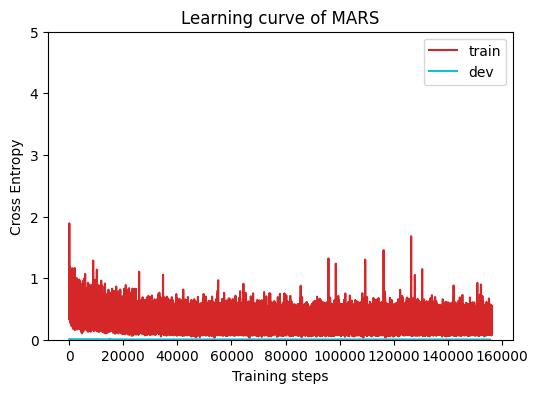

In [30]:
# import numpy as np
# loss = np.loadtxt(fname=r'D:\python-learn\Astronomy\Mars_classfier_loss.csv', skiprows=1, delimiter=',' )
# # print(np.where(loss == 0,1,0))
# dev = []
# train = []
# temp = 0
# train_dev = loss[:,np.newaxis,1].ravel().tolist()
# for i, value in enumerate(train_dev):
#     if value == 0:
#         temp = i 
#     if temp < i:
#         dev.append(value)
# for i, value in enumerate(train_dev):
#     train.append(value)
#     if value == 0:
#        break 
            
# # print(len(loss_record['train']),len(loss_record['dev']))
# loss_record = {'train':[], 'dev':[]}
# loss_record['train'] = train
# loss_record['dev'] = dev

plot_learning_curve(loss_record, title='MARS')

C:\Users\user\AppData\Local\Temp\ipykernel_33976\2513823970.py:7: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  torch.nn.init.kaiming_normal(self.conv.weight, nonlinearity='relu')


  0%|          | 0/114 [00:00<?, ?it/s]

(7244,)
(7244,)


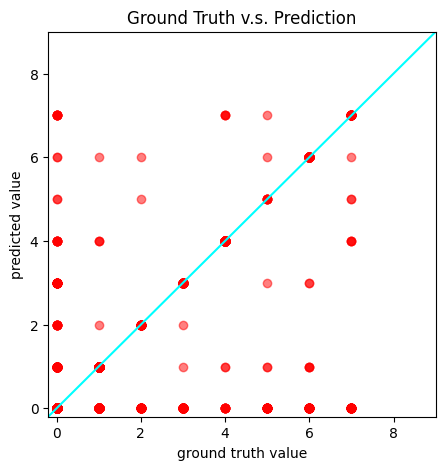

'label 5 7 預測超爛，沒有TP 過'

In [31]:
# del model
model = Classifier(n_chans=32, n_blocks=3).to(device) #0117 收斂太慢的原因是你的loss.item() 耗掉大量計算儲存資源

state = torch.load(save_path, map_location='cpu')  # Load your best model
model.load_state_dict(state)
img_test, yt, yp = plot_pred(test_loader, model, device)


"""label 5 7 預測超爛，沒有TP 過"""

In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve


def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown



  0%|          | 0/114 [00:00<?, ?it/s]

[[5790   72   14   21    7    8    8    8]
 [ 142  377    1    0    3    0    1    1]
 [  47    1   43    1    0    0    0    3]
 [  76    1    3   99    0    0    0    1]
 [  11    0    0    0  164    0    0    5]
 [  31    1    0    0    0    8    0    4]
 [  37    2    0    1    0    0  146    1]
 [  42    1    0    1    1    1    0   59]]
label 7 spider :
 tp59, fp23, fn46, tn7116
labels 各個總數 [5928  525   95  180  180   44  187  105]


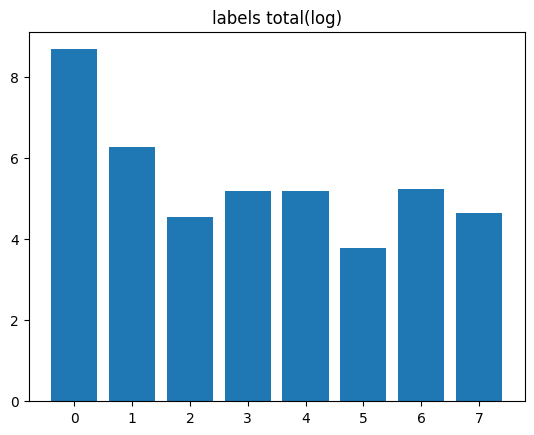

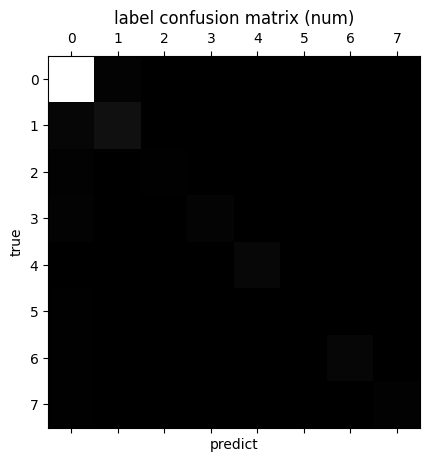

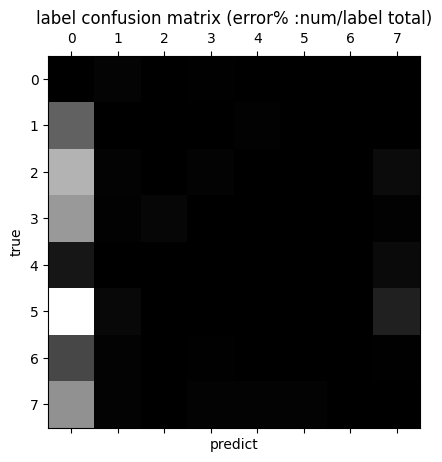

In [33]:
# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
model.eval()

# Initialize a list to store the predictions.
predictions = []
ytrue = []
# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    # But here the variable "labels" is useless since we do not have the ground-truth.
    # If printing out the labels, you will find that it is always 0.
    # This is because the wrapper (DatasetFolder) returns images and labels for each batch,
    # so we have to create fake labels to make it work normally.
    imgs, labels = batch

    # We don't need gradient in testing, and we don't even have labels to compute loss.
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        logits = model(imgs.to(device))
        # print(logits.dtype)
        # print(type(logits))
        

    # Take the class with greatest logit as prediction and record it.
    predictions.extend(logits.argmax(dim=-1).cpu().numpy().tolist())
    ytrue.extend(labels.cpu().numpy().tolist())
  
# plt.rcParams['font.sans-serif'] = ['Noto Sans TC'] 
# 混淆矩陣  
from sklearn.metrics import confusion_matrix
# print(len(predictions),len(ytrue))
cm = confusion_matrix(ytrue, predictions)
print(cm)
# 知道類別7 spider 的 tp fp fn tn
tp = cm[7,7]
fp = np.sum(cm[:7,7], axis=0)
fn =  np.sum(cm[7,:7], axis=0)
tn = np.sum(cm[:7,:7])
print(f"label 7 spider :\n tp{tp}, fp{fp}, fn{fn}, tn{tn}")

# label 總數各類別分布
cm_labels_hist = np.sum(cm, axis=1)
print('labels 各個總數',cm_labels_hist)
plt.bar(x=[0,1,2,3,4,5,6,7],height= np.log(cm_labels_hist) )
plt.title('labels total(log)')
plt.show()

plt.matshow(cm, cmap='gray')
plt.title('label confusion matrix (num)')
plt.xlabel('predict')
plt.ylabel('true')
plt.show()


'''
plt.matshow
Display an array as a matrix in a new figure window.
The origin is set at the upper left hand corner and rows (first dimension of the array) are displayed horizontally. 
The aspect ratio of the figure window is that of the array, unless this would make an excessively short or narrow figure.
Tick labels for the xaxis are placed on top.'''
row_sums =  cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums
np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap='gray')
plt.title('label confusion matrix (error% :num/label total)')
plt.xlabel('predict')
plt.ylabel('true')
plt.show()

# fpr, tpr, thresholds = roc_curve(ytrue, y_scores) #y_scores = 預測的各類別機率
# precisions, recalls, thresholds = precision_recall_curve(ytrue, y_scores)

[15, 20, 24, 27, 32, 34, 62, 80]
(7244, 1, 128, 128)
(7244, 128, 128, 1)


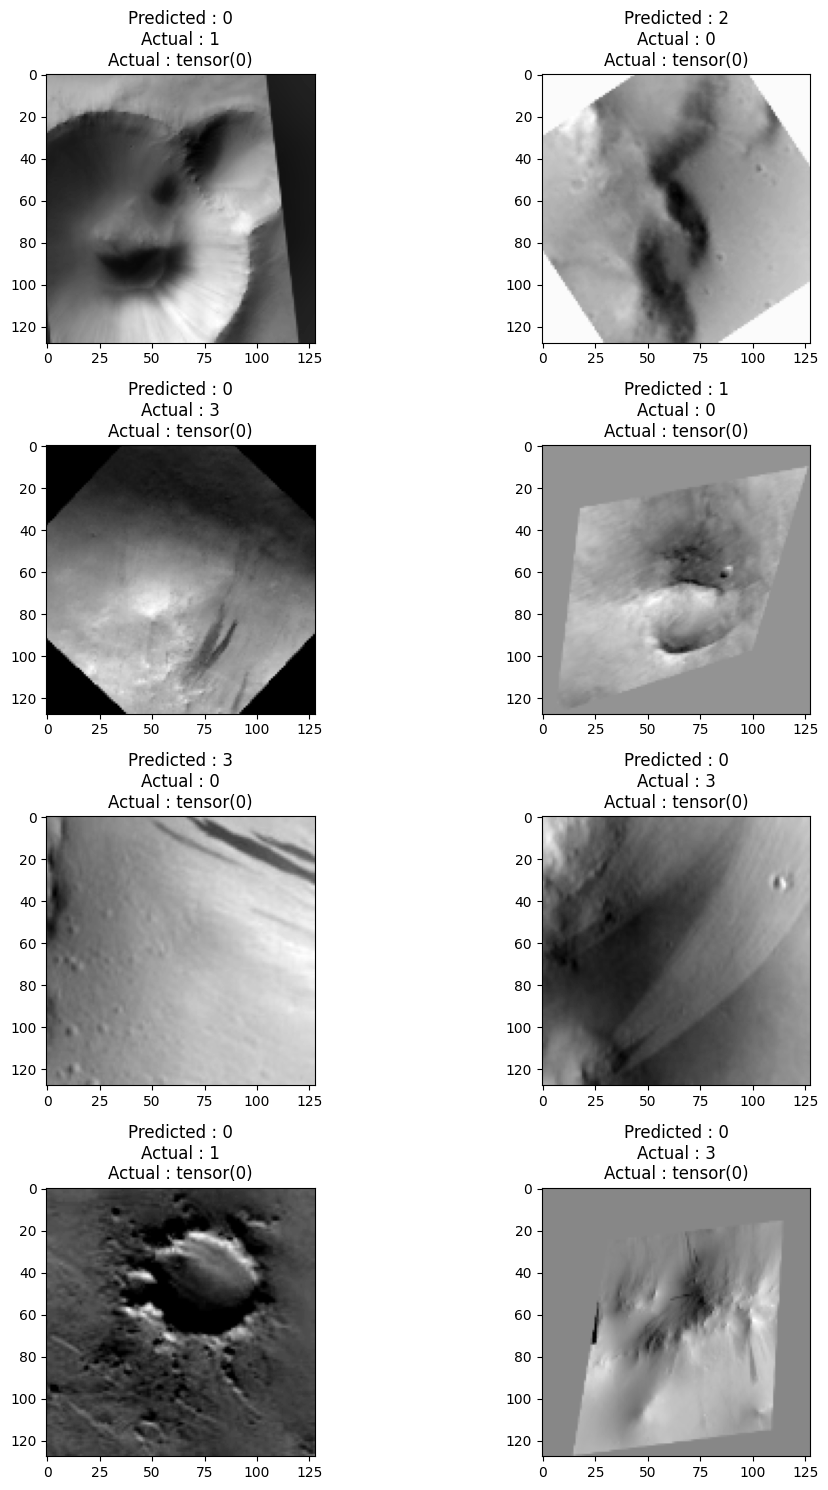

In [34]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]


i=0
for i in range(len(ytrue)):
    if(ytrue[i] != predictions[i]):
        mis_class.append(i)
    if(len(mis_class)==8): #紀錄八個預測錯誤
        break
print(mis_class)
# img_test = np.array(img_test)  #用np 接!
print(img_test.shape) 
img_test = img_test.transpose(0, 2, 3, 1)
print(img_test.shape) 

#  顯示的類別圖案標籤 有錯喔! 隕石坑耶
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(img_test[mis_class[count]], cmap='gray')
        ax[i,j].set_title("Predicted : "+str(predictions[mis_class[count]])+"\n"+ "Actual : "+str(ytrue[mis_class[count]]) +
                          "\n"+"Actual : "+str(classes[ytrue[mis_class[count]] ]) ) #"\n"+"Actual : "+str(classes[ytrue[mis_class[count]] ])
        plt.tight_layout()
        count+=1

In [35]:
# Save predictions into the file.
with open("Mars_predict.csv", "w") as f:

    # The first row must be "Id, Category"
    f.write("Id,Category\n")

    # For the rest of the rows, each image id corresponds to a predicted class.
    for i, pred in  enumerate(predictions):
         f.write(f"{i},{pred}\n")

In [36]:
import pandas as pd
label_map = pd.read_csv("landmarks_map-proj-v3_classmap.csv", header=None,usecols=[1])
# print(label_map.iloc[:,0])
# label_map.index
data= pd.read_csv("Mars_predict.csv")
data['Category'].map(label_map.iloc[:,0]) #Series function dict lambda

print("預測的各類別種類數量 \n", data['Category'].value_counts())


預測的各類別種類數量 
 0    6176
1     455
4     175
6     155
3     123
7      82
2      61
5      17
Name: Category, dtype: int64
